In [1]:
import os,sys
sys.path.insert(0, '../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textwrap import wrap

from project.utils.dataframe_processor import load_csv

In [3]:
# Load data sets
df_movie = load_csv("../data/movie.csv")
df_rating = load_csv("../data/rating.csv")

# Movie Data Set

In [4]:
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [6]:
df_movie.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [7]:
df_movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [8]:
df_movie["movieId"].nunique()

27278

# Ratings Data Set

In [9]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [10]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [11]:
df_rating.count()

userId       20000263
movieId      20000263
rating       20000263
timestamp    20000263
dtype: int64

In [12]:
df_rating.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [13]:
df_rating.dtypes

userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object

In [14]:
df_rating["userId"].nunique()

138493

In [15]:
user_rating_count = df_rating.groupby("userId")["rating"].count()
user_rating_count.describe()

count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: rating, dtype: float64

In [16]:
user_rating_count.head()

userId
1    175
2     61
3    187
4     28
5     66
Name: rating, dtype: int64

Text(0, 0.5, 'Rating Count')

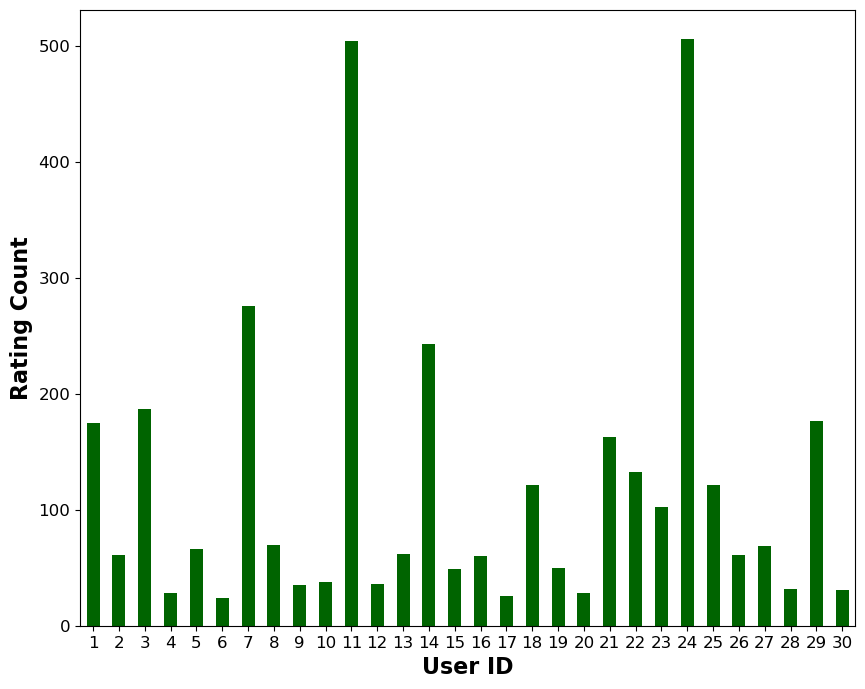

In [17]:
# plt.figure(figsize=(20,16))
plt.rcParams["figure.figsize"] = (10,8)
ax = user_rating_count.head(30).plot.bar(color="darkgreen")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
ax.set_xlabel("User ID", fontsize=16, weight="bold")
ax.set_ylabel("Rating Count", fontsize=16, weight="bold")


# Base DF: Movie-Rating

In [18]:
base_df = pd.merge(df_rating, df_movie, on='movieId')

In [19]:
base_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


In [20]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ GB


In [21]:
base_df.count()

userId       20000263
movieId      20000263
rating       20000263
timestamp    20000263
title        20000263
genres       20000263
dtype: int64

In [22]:
base_df.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [23]:
base_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp     object
title         object
genres        object
dtype: object

In [24]:
# Check nulls per column
base_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [25]:
# Get the average rating per title
ratings_mean_count = pd.DataFrame(base_df.groupby("title")["rating"].mean())
ratings_mean_count.rename(columns={"rating":"rating_mean"}, inplace=True)
ratings_mean_count.head()

,rating_mean
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091
$ellebrity (Sellebrity) (2012),2.000000


In [26]:
# Sorted average rating per title
ratings_mean_count.sort_values(by="rating_mean", ascending=False).head()

,rating_mean
title,
Small Roads (2011),5.0
Divorce (1945),5.0
The Beautiful Story (1992),5.0
Into the Middle of Nowhere (2010),5.0
The Sea That Thinks (2000),5.0


In [27]:
# Get the number of ratings given per movie
ratings_mean_count["rating_count"] = pd.DataFrame(base_df.groupby("title")["rating"].count())
ratings_mean_count.sort_values(by="rating_count", ascending=False).head()

,rating_mean,rating_count
title,,
Pulp Fiction (1994),4.174231,67310
Forrest Gump (1994),4.029000,66172
"Shawshank Redemption, The (1994)",4.446990,63366
"Silence of the Lambs, The (1991)",4.177057,63299
Jurassic Park (1993),3.664741,59715


In [28]:
ratings_mean_count.shape

(26729, 2)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

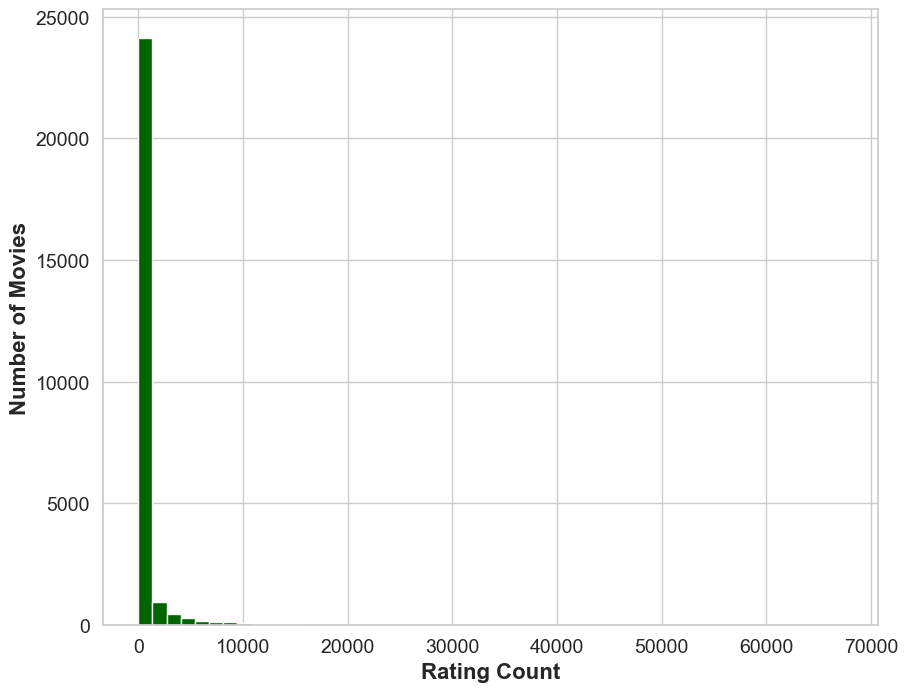

In [45]:
plt.figure(figsize=(10,8))
ratings_mean_count['rating_count'].hist(bins=50, color="darkgreen")
plt.ylabel("Number of Movies", fontsize=16, weight="bold")
plt.xlabel("Rating Count", fontsize=16, weight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [30]:
ratings_mini = ratings_mean_count.sort_values(by="rating_count", ascending=False).reset_index().head(10)
ratings_mini.head()

,title,rating_mean,rating_count
0,Pulp Fiction (1994),4.174231,67310
1,Forrest Gump (1994),4.029000,66172
2,"Shawshank Redemption, The (1994)",4.446990,63366
3,"Silence of the Lambs, The (1991)",4.177057,63299
4,Jurassic Park (1993),3.664741,59715


C:\Users\user\AppData\Local\Temp\ipykernel_2608\4096935827.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ylabels, fontsize=10, rotation=0)


Text(0, 0.5, 'Movie Title')

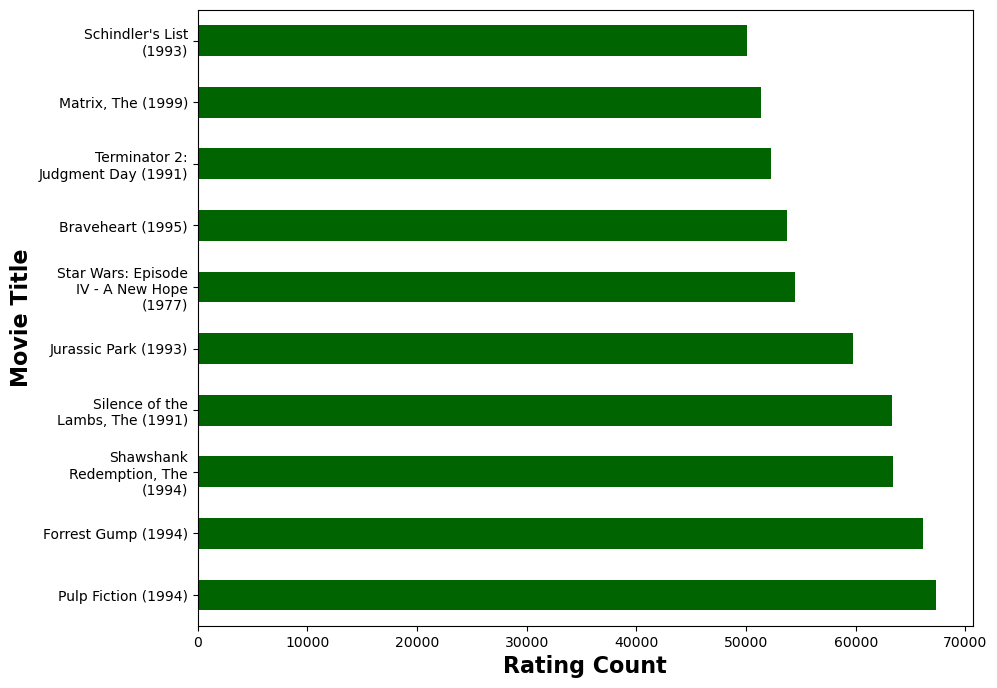

In [31]:
xlabels = ['\n'.join(wrap(l, 20)) for l in ratings_mini["title"]]
ylabels = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]

# plt.figure(figsize=(20,16))
plt.rcParams["figure.figsize"] = (10,8)
ax = ratings_mini.plot.barh("title",'rating_count', color="darkgreen")
# ax.bar_label(ax.containers[0])
ax.set_xticklabels(ylabels, fontsize=10, rotation=0)
ax.set_yticklabels(xlabels, fontsize=10)
ax.get_legend().remove()
ax.set_xlabel("Rating Count", fontsize=16, weight="bold")
ax.set_ylabel("Movie Title", fontsize=16, weight="bold")


In [32]:
ratings_mean_count[ratings_mean_count.index=="Pulp Fiction (1994)"]["rating_mean"]

title
Pulp Fiction (1994)    4.174231
Name: rating_mean, dtype: float64

In [33]:
ratings_mean_count[ratings_mean_count.index=="Forrest Gump (1994)"]["rating_mean"]

title
Forrest Gump (1994)    4.029
Name: rating_mean, dtype: float64

In [34]:
ratings_mean_count[ratings_mean_count.index=="Shawshank Redemption, The (1994)"]["rating_mean"]

title
Shawshank Redemption, The (1994)    4.44699
Name: rating_mean, dtype: float64

In [35]:
ratings_mean_count[ratings_mean_count.index=="Silence of the Lambs, The (1991)"]["rating_mean"]

title
Silence of the Lambs, The (1991)    4.177057
Name: rating_mean, dtype: float64

In [36]:
ratings_mean_count[ratings_mean_count.index=="Jurassic Park (1993)"]["rating_mean"]

title
Jurassic Park (1993)    3.664741
Name: rating_mean, dtype: float64

In [37]:
ratings_mean_count[ratings_mean_count.index=="Star Wars: Episode IV - A New Hope (1977)"]["rating_mean"]

title
Star Wars: Episode IV - A New Hope (1977)    4.190672
Name: rating_mean, dtype: float64

In [38]:
ratings_mean_count[ratings_mean_count.index=="Braveheart (1995)"]["rating_mean"]

title
Braveheart (1995)    4.042534
Name: rating_mean, dtype: float64

In [39]:
ratings_mean_count[ratings_mean_count.index=="Terminator 2: Judgment Day (1991)"]["rating_mean"]

title
Terminator 2: Judgment Day (1991)    3.931954
Name: rating_mean, dtype: float64

In [40]:
ratings_mean_count[ratings_mean_count.index=="Matrix, The (1999)"]["rating_mean"]

title
Matrix, The (1999)    4.187186
Name: rating_mean, dtype: float64

In [41]:
ratings_mean_count[ratings_mean_count.index=="Schindler's List (1993)"]["rating_mean"]

title
Schindler's List (1993)    4.310175
Name: rating_mean, dtype: float64

In [42]:
ratings_mean_count[ratings_mean_count["rating_count"]<1500].count()

rating_mean     24279
rating_count    24279
dtype: int64

Most of the movies have received less than 1500 ratings with some movies having 60k+ ratings.

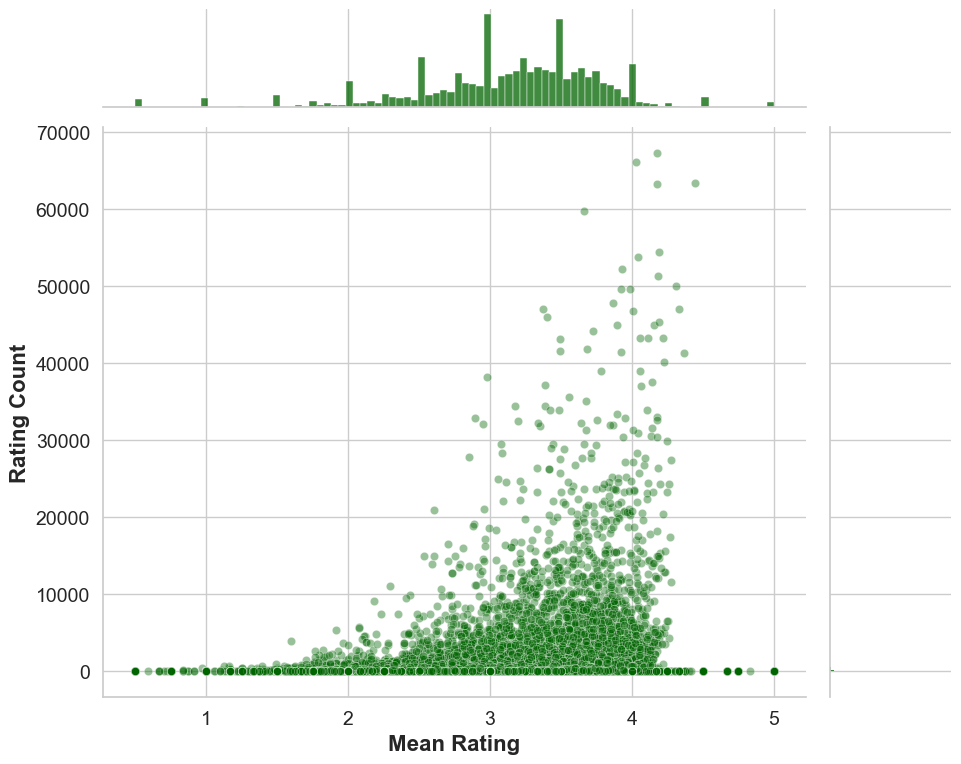

In [43]:
# plt.figure(figsize = (10,8))
customParams =  {'figsize': (10,8)}
sns.set_theme(style="whitegrid")
ax = sns.jointplot(x = 'rating_mean',
              y = 'rating_count',
              color = 'darkgreen',
              data = ratings_mean_count,
              alpha = 0.4)
plt.ylabel("Rating Count", fontsize=16, weight="bold")
plt.xlabel("Mean Rating", fontsize=16, weight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.fig.set_size_inches(10,8)


Ratings are clustered in the value of 3 and 4 with only a few in 5.
Movies with higher mean rating also have higher rating count.

In [44]:
df = pd.merge(df_movie, df_rating, on="movieId")
ratings = df.dropna(axis=0, subset = ['title'])    # Drop all 'NaN' values
movie_rating_Count = (ratings.groupby(by=['title'])['rating'].count().reset_index().
                     rename(columns = {'rating':'TotalRatingCount'})[['title', 'TotalRatingCount']])

movie_rating_Count.head(10)

,title,TotalRatingCount
0,#chicagoGirl: The Social Network Takes on a Di...,3
1,$ (Dollars) (1971),24
2,$5 a Day (2008),39
3,$9.99 (2008),55
4,$ellebrity (Sellebrity) (2012),2
5,'71 (2014),35
6,'Hellboy': The Seeds of Creation (2004),87
7,"'Human' Factor, The (Human Factor, The) (1975)",2
8,'Neath the Arizona Skies (1934),22
9,'R Xmas (2001),19
